In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import importlib
import calculate_SSBSWPC
importlib.reload(calculate_SSBSWPC)
from calculate_SSBSWPC import calculate_SSBSWPC



Fs = 1
corr_fs = .01
simulation_num = 10
winsize = 7
Tr = 1/Fs
b, a = sp.signal.butter(6, .1/(Fs/2))
tn = np.arange(0,400,Tr)
modfs_vec = np.linspace(0, 1/Tr/2,20)[:-1]

all_scores = np.zeros([simulation_num, modfs_vec.shape[0]])
for modn in np.arange(modfs_vec.shape[0]):
    for simn in np.arange(simulation_num):
        Tc_white = np.random.randn(tn.shape[0],2)
        
        for cn in np.arange(0, Tc_white.shape[1]):    
            Tc_white[:,cn] = sp.signal.filtfilt(b, a, Tc_white[:,cn])

        corr_tc = 0.7*np.cos(2*np.pi*corr_fs*tn)   
        Tc = np.zeros(Tc_white.shape)
        for nn in np.arange(0,corr_tc.shape[0]):
            sigma = np.array([[1, corr_tc[nn]], [corr_tc[nn], 1]])
            Tc[nn,:] = np.matmul(np.linalg.cholesky(sigma),Tc_white[nn,:])
            
        
        SSBSWPC_vec, win_idx = calculate_SSBSWPC(Tc, winsize, Tr, mod_fs = modfs_vec[modn], win_type = 'rect')
        all_scores[simn, modn] = np.corrcoef(np.squeeze(SSBSWPC_vec),corr_tc[win_idx])[0, 1]
    print(f"progress {(modn+1)/modfs_vec.shape[0]*100:.2f}%", end="\r")

KeyboardInterrupt: 

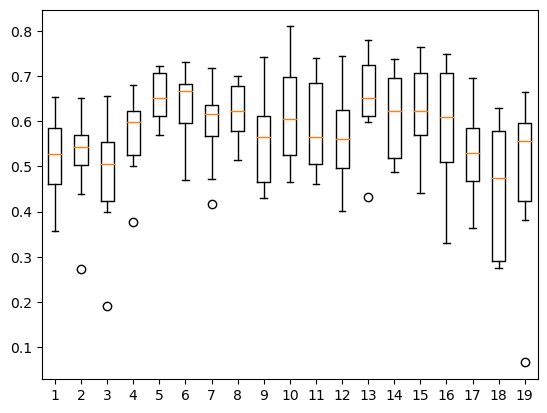

In [11]:
plt.boxplot(all_scores)
plt.show()

In [14]:
aa = Tc[:,np.newaxis,:] * Tc[:,:,np.newaxis]
aa.shape

(400, 2, 2)

(200,)
(200,)


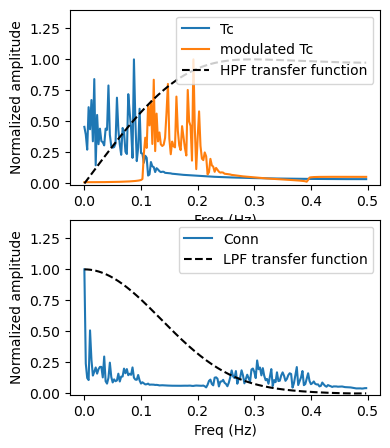

In [31]:
import importlib
import calculate_SSBSWPC
importlib.reload(calculate_SSBSWPC)
from calculate_SSBSWPC import calculate_SSBSWPC


SSBSWPC_vec, win_idx = calculate_SSBSWPC(Tc, winsize, Tr, mod_fs = modfs_vec[modn], win_type = 'gauss', plot_flag=1)

# SSBSWPC_vec.shape

In [1]:
Tc.shape

NameError: name 'Tc' is not defined